## Procedures (Procedures)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_procedures = pd.read_csv('../../synthea-sample-data/data/10k_synthea_covid19_csv/procedures.csv')
df_procedures

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,430193006,Medication Reconciliation (procedure),495.80,NaN,NaN
1,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
2,2020-01-06,067318a4-db8f-447f-8b6e-f2f61e9baaa5,df2e9ebd-090c-4fb4-b749-ec6e4cf3e75e,430193006,Medication Reconciliation (procedure),453.37,NaN,NaN
3,2020-03-13,067318a4-db8f-447f-8b6e-f2f61e9baaa5,1ea74a77-3ad3-4948-a9cc-3084462035d6,261352009,Face mask (physical object),516.65,840544004.0,Suspected COVID-19
4,2020-04-28,067318a4-db8f-447f-8b6e-f2f61e9baaa5,e03b96de-5604-4989-a2d5-03a63e041eab,117015009,Throat culture (procedure),2169.16,43878008.0,Streptococcal sore throat (disorder)
...,...,...,...,...,...,...,...,...
100422,2020-05-16,2712205f-755e-4897-acb3-926895b7d635,e5497276-3186-488a-a556-a20a28c19c59,265764009,Renal dialysis (procedure),516.65,NaN,NaN
100423,2020-05-19,2712205f-755e-4897-acb3-926895b7d635,9af81365-e947-43b6-b4af-b94efb9182c5,265764009,Renal dialysis (procedure),516.65,NaN,NaN
100424,2020-05-26,2712205f-755e-4897-acb3-926895b7d635,823b575f-79ce-4946-917a-f7989c0de848,180325003,Electrical cardioversion,34119.50,49436004.0,Atrial Fibrillation
100425,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,d4e1c9e6-2b5e-43a5-9fad-cef200c9e5c5,265764009,Renal dialysis (procedure),516.65,NaN,NaN


In [3]:
df_procedures = df_procedures.convert_dtypes()
print(df_procedures.dtypes)
df_procedures.isnull().sum()

DATE                  string
PATIENT               string
ENCOUNTER             string
CODE                   Int64
DESCRIPTION           string
BASE_COST            Float64
REASONCODE           Float64
REASONDESCRIPTION     string
dtype: object


DATE                     0
PATIENT                  0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
BASE_COST                0
REASONCODE           24954
REASONDESCRIPTION    24954
dtype: int64

In [4]:
cols = ['CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION']
proc = df_procedures[cols].drop_duplicates().dropna()
print(proc['CODE'].nunique())
print(proc['DESCRIPTION'].nunique())
proc

102
105


,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
1,261352009,Face mask (physical object),840544004.0,Suspected COVID-19
4,117015009,Throat culture (procedure),43878008.0,Streptococcal sore throat (disorder)
14,371908008,Oxygen administration by mask (procedure),389087006.0,Hypoxemia (disorder)
15,431182000,Placing subject in prone position (procedure),389087006.0,Hypoxemia (disorder)
37,305428000,Admission to orthopedic department,58150001.0,Fracture of clavicle
...,...,...,...,...
70632,387685009,Surgical manipulation of shoulder joint,307731004.0,Injury of tendon of the rotator cuff of shoulder
74560,43075005,Partial resection of colon,93761005.0,Primary malignant neoplasm of colon
76346,108290001,Radiation oncology AND/OR radiotherapy (proced...,254837009.0,Malignant neoplasm of breast (disorder)
97688,88039007,Transplant of lung (procedure),185086009.0,Chronic obstructive bronchitis (disorder)


In [5]:
n=25
print('List of 25 values:')
top25 = proc['CODE'].value_counts()[:n].index.tolist()
print(top25)

List of 25 values:
[312681000, 384700001, 288086009, 703423002, 274474001, 40701008, 43075005, 5880005, 699253003, 18286008, 90226004, 127783003, 429609002, 698354004, 274031008, 112798008, 399208008, 117015009, 26763009, 15081005, 305428000, 88039007, 103746007, 104435004, 85548006]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_26420\4131379723.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top25 = proc['CODE'].value_counts()[:n].index.tolist()


In [6]:
top25 = proc.loc[(proc['CODE'].isin(top25))]
top25

,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
4,117015009,Throat culture (procedure),43878008.0,Streptococcal sore throat (disorder)
37,305428000,Admission to orthopedic department,58150001.0,Fracture of clavicle
51,90226004,Cytopathology procedure preparation of smear ...,72892002.0,Normal pregnancy
58,5880005,Physical examination of mother,72892002.0,Normal pregnancy
86,40701008,Echocardiography (procedure),230690007.0,Stroke
...,...,...,...,...
30478,429609002,Lung volume reduction surgery (procedure),185086009.0,Chronic obstructive bronchitis (disorder)
31000,103746007,Heparin therapy (procedure),706870000.0,Acute pulmonary embolism (disorder)
61598,88039007,Transplant of lung (procedure),87433001.0,Pulmonary emphysema (disorder)
74560,43075005,Partial resection of colon,93761005.0,Primary malignant neoplasm of colon


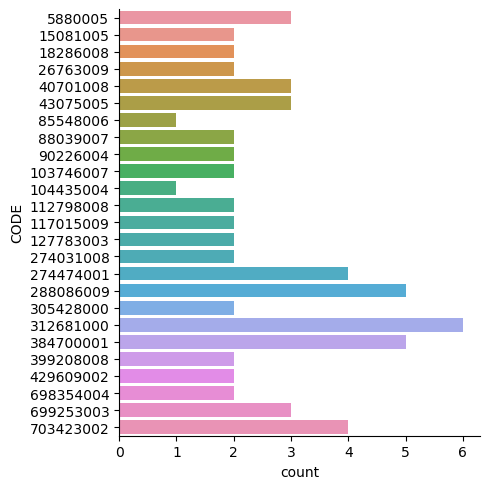

In [7]:
sns.catplot(data=top25, y = 'CODE', kind = 'count')

In [8]:
print('List of 25-50 values:')
top25_50 = proc['CODE'].value_counts()[25:50].index.tolist()
print(top25_50)
top25_50 = proc.loc[(proc['CODE'].isin(top25_50))]


List of 25-50 values:
[269911007, 65588006, 396487001, 31208007, 43060002, 69031006, 443497002, 367336001, 261352009, 447365002, 234262008, 108290001, 387685009, 177157003, 167995008, 445912000, 305340004, 183450002, 76164006, 33195004, 90470006, 80146002, 392021009, 91602002, 13569004]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_26420\1053331210.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top25_50 = proc['CODE'].value_counts()[25:50].index.tolist()


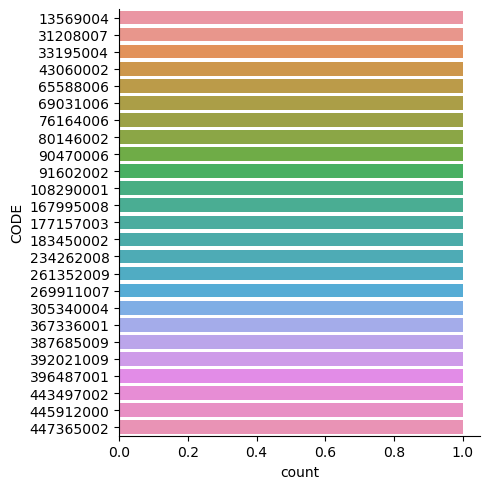

In [9]:
sns.catplot(data=top25_50, y = 'CODE', kind = 'count')

In [10]:
print('List of 75-105 values:')
top75_105 = proc['CODE'].value_counts()[75:105].index.tolist()
print(top75_105)
top75_105 = proc.loc[(proc['CODE'].isin(top75_105))]


List of 75-105 values:
[169230002, 252160004, 431182000, 371908008, 167271000, 443529005, 271442007, 169673001, 228557008, 171207006, 232717009, 11466000, 18946005, 180325003, 23426006, 51116004, 35025007, 275833003, 171231001, 71651007, 66348005, 237001001, 118001005, 433112001, 268556000, 399014008, 305433001]


C:\Users\Mirna Elizondo\AppData\Local\Temp\ipykernel_26420\3064000613.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top75_105 = proc['CODE'].value_counts()[75:105].index.tolist()


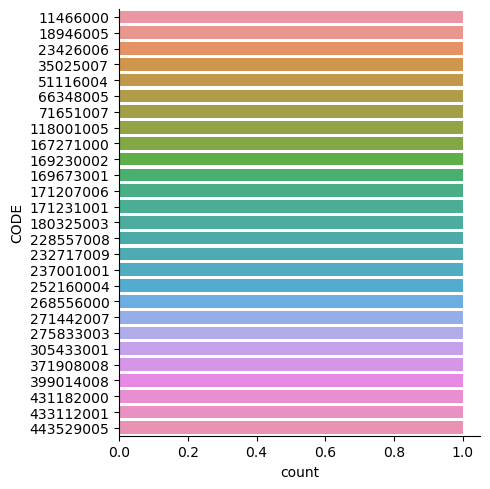

In [11]:
sns.catplot(data=top75_105, y = 'CODE', kind = 'count')